In [2]:
#Problem A 1 b
import numpy as np

# Define ranges for r with specific increments
r_values = np.concatenate([
    np.arange(1e-4, 1e-3, 6.0e-5),
    np.arange(1e-3, 1e-2, 4.5e-5),
    np.arange(1e-2, 0.05, 2.667e-4)
])


In [6]:
def hindmarsh_rose(t, y, I, r):
    x, y, z = y
    dxdt = y - x**3 + 3*x**2 - z + I
    dydt = 1 - 5*x**2 - y
    dzdt = r * (4*(x + 1.6) - z)
    return [dxdt, dydt, dzdt]


In [8]:
from scipy.integrate import solve_ivp

def get_spikes(t, x, threshold=1.0):
    crossings = np.where((x[:-1] < threshold) & (x[1:] >= threshold))[0]
    return t[crossings + 1]

# Constants
I = 3.25
initial_conditions = [-1.0, 2.0, 0.5]
t_span = [0, 1500]
t_eval = np.arange(0, 1500, 0.005)

# Collect data
log_r_values = []
log_isis = []

for r in r_values:
    sol = solve_ivp(hindmarsh_rose, t_span, initial_conditions, args=(I, r), t_eval=t_eval, method='RK45')
    t, x = sol.t, sol.y[0]
    spikes = get_spikes(t, x)
    if len(spikes) > 1:
        isis = np.diff(spikes)
        log_isis.extend(np.log(isis))
        log_r_values.extend([np.log(r)] * len(isis))


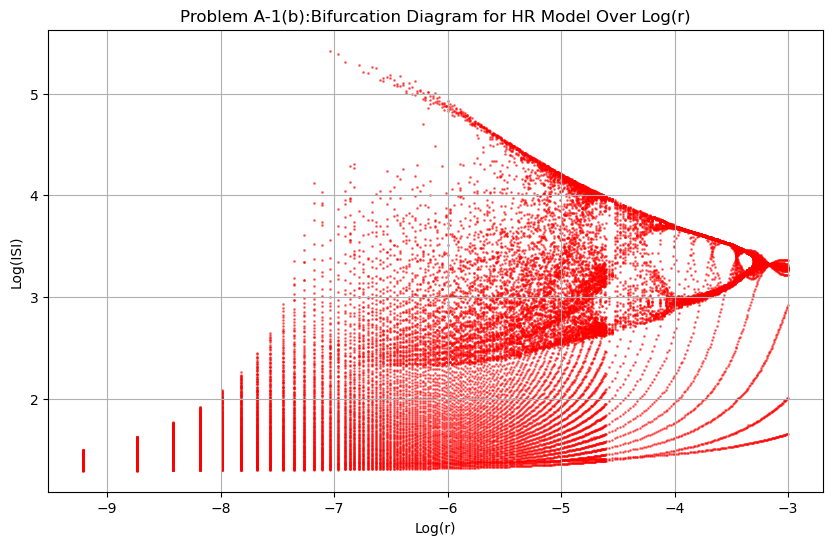

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(log_r_values, log_isis, color='red', s=1, alpha=0.5)
plt.xlabel('Log(r)')
plt.ylabel('Log(ISI)')
plt.title('Problem A-1(b):Bifurcation Diagram for HR Model Over Log(r)')
plt.grid(True)
plt.savefig('Prob-A-1b.png')
plt.show()
